# One-year Data Statistics

## Code Console

In [1]:
## import libraries
from xmitgcm import open_mdsdataset
from datetime import datetime
import numpy as np
import xarray as xr
import scipy.interpolate
import math
import xgcm
import os
from matplotlib import pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline

In [2]:
import time
import re
from matplotlib.animation import FuncAnimation
from py_eddy_tracker.appli.gui import Anim
from py_eddy_tracker.observations.observation import EddiesObservations, Table
from py_eddy_tracker.observations.tracking import TrackEddiesObservations

import imageio.v2 as imageio # version of imageio
import os
import os.path

## Load data

In [3]:
sub_1y = xr.open_dataset('/data/home/zhangrd/sub_1y.nc')
a_sub = xr.open_dataset('/data/home/zhangrd/eddyTracker/tracks_MITgcm/1y_sub/Anticyclonic.nc')
c_sub = xr.open_dataset('/data/home/zhangrd/eddyTracker/tracks_MITgcm/1y_sub/Cyclonic.nc')

In [4]:
frt_1y = xr.open_dataset('/data/home/zhangrd/frt_1y.nc')
a_frt = xr.open_dataset('/data/home/zhangrd/eddyTracker/tracks_MITgcm/1y_frt/Anticyclonic.nc')
c_frt = xr.open_dataset('/data/home/zhangrd/eddyTracker/tracks_MITgcm/1y_frt/Cyclonic.nc')

In [5]:
c_sub.track.values[-1], a_sub.track.values[-1], c_frt.track.values[-1], a_frt.track.values[-1]

(513, 513, 453, 600)

In [ ]:
# sub_1y = xr.open_dataset('/data/home/zhangrd/sub_1y.nc')
newa_sub = xr.open_dataset('/data/home/zhangrd/Data/sub_1yTracks/Anticyclonic.nc')
newc_sub = xr.open_dataset('/data/home/zhangrd/Data/sub_1yTracks/Cyclonic.nc')
# frt_1y = xr.open_dataset('/data/home/zhangrd/frt_1y.nc')
newa_frt = xr.open_dataset('/data/home/zhangrd/Data/frt_1yTracks/Anticyclonic.nc')
newc_frt = xr.open_dataset('/data/home/zhangrd/Data/frt_1yTracks/Cyclonic.nc')
newc_sub.track.values[-1], newa_sub.track.values[-1], newc_frt.track.values[-1], newa_frt.track.values[-1]

## basic features

### 1. check the index of a single snapshot in the Obs.(Figure.2)

In [8]:
data_dir = '/data2/home/liutongya/data/box32_out/'
ds_1y = open_mdsdataset(data_dir, prefix={'theta_ave', 'xyMom_ave', 'etan_ave'}).chunk()
ds_1y

/data/home/zhangrd/.conda/envs/geo_scipy/lib/python3.7/site-packages/xmitgcm/mds_store.py:914: UserWarning: Couldn't find available_diagnostics.log in /data2/home/liutongya/data/box32_out/ or /data2/home/liutongya/data/box32_out/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


<xarray.Dataset>
Dimensions:  (XC: 1920, YC: 1920, XG: 1920, YG: 1920, Z: 29, Zp1: 30, Zu: 29, Zl: 29, time: 360)
Coordinates: (12/30)
  * XC       (XC) >f4 0.01562 0.04688 0.07812 0.1094 ... 59.89 59.92 59.95 59.98
  * YC       (YC) >f4 0.01562 0.04688 0.07812 0.1094 ... 59.89 59.92 59.95 59.98
  * XG       (XG) >f4 0.0 0.03125 0.0625 0.09375 ... 59.88 59.91 59.94 59.97
  * YG       (YG) >f4 0.0 0.03125 0.0625 0.09375 ... 59.88 59.91 59.94 59.97
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -40.0 ... -2.75e+03 -3.25e+03 -3.75e+03
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2.5e+03 -3e+03 -3.5e+03 -4e+03
    ...       ...
    maskC    (Z, YC, XC) bool dask.array<chunksize=(29, 1920, 1920), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(29, 1920, 1920), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(29, 1920, 1920), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(29,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 60 days 00:04:48 ... 61 days 04:48:00
Data variables:
    ETAN     (time, YC, XC) float32 dask.array<chunksize=(1, 1920, 1920), meta=np.ndarray>
    oceQsw   (time, YC, XC) float32 dask.array<chunksize=(1, 1920, 1920), meta=np.ndarray>
    THETA    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 29, 1920, 1920), meta=np.ndarray>
    UVEL     (time, Z, YC, XG) float32 dask.array<chunksize=(1, 29, 1920, 1920), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) float32 dask.array<chunksize=(1, 29, 1920, 1920), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 29, 1920, 1920), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...

In [9]:
## 反求某天的某个识别结果是Obs编号多少 sub区域
eindex = 32
day    = 131 # d131->2034; d42->1945

obs_index = np.where(c_sub.track.data==eindex)
# sum(a_sub.track.data==eindex),obs_index[0]
for r in obs_index[0]:
    days = int( (c_sub.time[r]-np.datetime64('2022-01-01T00:00:00.000000000'))/np.timedelta64(1,'D') )
    # print(str(days))
    if( days==day ): 
        print(str(r))
        break
r
## 查询经纬度
# c_sub.latitude.data[r], c_sub.longitude.data[r], c_sub.latitude_max.data[r], c_sub.longitude_max.data[r],  # Latitude center of the best fit circle and Latitude of the inner contour
# c_sub.effective_contour_latitude.data[r], c_sub.effective_contour_longitude.data[r],  # Latitudes of effective contour
# c_sub.speed_contour_latitude.data[r], c_sub.speed_contour_longitude.data[r],  # Latitudes of speed contour

2034


2034

In [10]:
# lenth =  c_sub.effective_radius[r]*2/(1000*111)
lenth_x =  c_sub.effective_radius[r]*1.8/(1000*111)
lenth_y =  c_sub.effective_radius[r]*1.0/(1000*111)
iis   =  math.floor((c_sub.longitude_max[r]-lenth_x)*32)
iie   =  math.ceil((c_sub.longitude_max[r]+lenth_x)*32)
jjs   =  math.floor((c_sub.latitude_max[r]-lenth_y)*32)
jje   =  math.ceil((c_sub.latitude_max[r]+lenth_y)*32)
days_131 = int( (c_sub.time[2034]-np.datetime64('2022-01-01T00:00:00.000000000'))/np.timedelta64(1,'D') )
date131_str = '_day' + str(days_131).zfill(2)

iis042=  math.floor((c_sub.longitude_max[1945]-lenth_x)*32)
iie042=  math.ceil((c_sub.longitude_max[1945]+lenth_x)*32)
jjs042=  math.floor((c_sub.latitude_max[1945]-lenth_y)*32)
jje042=  math.ceil((c_sub.latitude_max[1945]+lenth_y)*32)
days_042 = int( (c_sub.time[1945]-np.datetime64('2022-01-01T00:00:00.000000000'))/np.timedelta64(1,'D') )
date042_str = '_day' + str(days_042).zfill(2)

lev1=np.linspace(-1.2,1.2,25)
lev2=np.linspace(-8,8,17)
lev3=np.linspace(0,1,21)

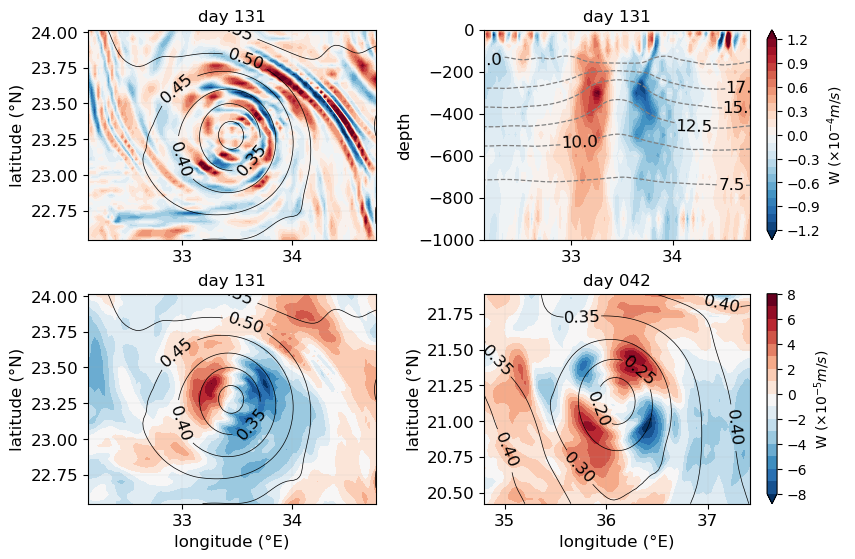

In [29]:
fig = plt.figure(figsize=(9, 6))
# 子图大小位置
pos1=[0.12,0.56,0.32,0.35] #左,下,长度,高度
pos2=[0.56,0.56,0.37,0.35]
pos3=[0.12,0.12,0.32,0.35]
pos4=[0.56,0.12,0.37,0.35]

# 子图 1
ax1 = plt.axes(pos1)
etan = ds_1y.ETAN[days_131,jjs:jje,iis:iie].plot.contour(levels=lev3, colors='k', linewidths=0.5)
plt.clabel(etan, inline=10, fontsize=12)
(ds_1y.WVEL[days_131,4,jjs:jje,iis:iie]*10000).plot.contourf(cmap='RdBu_r', levels=lev1, add_colorbar=False)
plt.grid(linewidth='0.1')
plt.title('day 131',fontsize=12,fontweight='500') # in 50m
plt.xlabel('')
plt.ylabel('latitude (°N)', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

# 子图 2
ax2 = plt.axes(pos2)
theta = ds_1y.THETA[days_131,:,round((jjs+jje)/2),iis:iie].plot.contour(levels=10, colors='gray', linestyles='dashed', linewidths=0.9)
plt.clabel(theta, inline=10, fontsize=12, colors='k')
(ds_1y.WVEL[days_131,:,round((jjs+jje)/2),iis:iie]*10000).plot.contourf(cmap='RdBu_r', levels=lev1, cbar_kwargs=dict(label=r'W ($ \times 10^{-4} m/s$)'))
plt.grid(linewidth='0.1')
plt.title('day 131',fontsize=12,fontweight='500') # in profile
plt.ylim([-1000,0])
plt.xlabel('')
plt.ylabel('depth', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

# 子图 3
ax3 = plt.axes(pos3)
etan = ds_1y.ETAN[days_131,jjs:jje,iis:iie].plot.contour(levels=lev3, colors='k', linewidths=0.5)
plt.clabel(etan, inline=10, fontsize=12)
(np.mean(ds_1y.WVEL[days_131,6:14,jjs:jje,iis:iie],0)*100000).plot.contourf(cmap='RdBu_r', levels=lev2, add_colorbar=False)
plt.grid(linewidth='0.1')
plt.title('day 131',fontsize=12,fontweight='500') # mean 100-500m
plt.xlabel('longitude (°E)', fontsize=12)
plt.ylabel('latitude (°N)', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

# 子图 4
ax4 = plt.axes(pos4)
etan = ds_1y.ETAN[days_042,jjs042:jje042,iis042:iie042].plot.contour(levels=lev3, colors='k', linewidths=0.5)
plt.clabel(etan, inline=10, fontsize=12)
(np.mean(ds_1y.WVEL[days_042,6:14,jjs042:jje042,iis042:iie042],0)*100000).plot.contourf(cmap='RdBu_r', levels=lev2, cbar_kwargs=dict(label=r'W ($ \times 10^{-5} m/s$)'))
plt.grid(linewidth='0.1')
plt.title('day 042',fontsize=12,fontweight='500') # mean 100-500m
plt.xlabel('longitude (°E)', fontsize=12)
plt.ylabel('latitude (°N)', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

# 保存图片
savePath = '/data/home/zhangrd/Pictures/1y_snapGIF/'
saveName = 'Fig2.png'

fp0 = os.path.exists(savePath)
if not fp0:
    os.makedirs(savePath)
plt.savefig(savePath + saveName, dpi=150)
# plt.close()

### 2. numbers of mono-, dipolar and quadruple structures (Figure.3)

In [6]:
cc_sub = np.load('/data/home/zhangrd/Data/coreNum/cc_sub_radius.npy')
ca_sub = np.load('/data/home/zhangrd/Data/coreNum/ca_sub_radius.npy')
cc_frt = np.load('/data/home/zhangrd/Data/coreNum/cc_frt_radius.npy')
ca_frt = np.load('/data/home/zhangrd/Data/coreNum/ca_frt_radius.npy')

In [7]:
len(c_sub.track), np.sum( cc_sub==0 ), np.sum( cc_sub==2 ), np.sum( cc_sub==4 ), np.sum( cc_sub==6 ), np.sum( cc_sub==8 ), 

(17029, 2989, 11566, 2365, 106, 3)

In [8]:
len(c_sub.track)/len(c_sub.track), np.sum( cc_sub==0 )/len(c_sub.track), np.sum( cc_sub==2 )/len(c_sub.track), np.sum( cc_sub==4 )/len(c_sub.track), np.sum( cc_sub==6 )/len(c_sub.track), 

(1.0,
 0.17552410593693113,
 0.6791943155793059,
 0.1388807328674614,
 0.0062246755534676144)

In [9]:
len(a_sub.track), np.sum( ca_sub==0 ), np.sum( ca_sub==2 ), np.sum( ca_sub==4 ), np.sum( ca_sub==6 ), np.sum( cc_sub==8 ), 

(13725, 3891, 8451, 1317, 64, 3)

In [10]:
len(a_sub.track)/len(a_sub.track), np.sum( ca_sub==0 )/len(a_sub.track), np.sum( ca_sub==2 )/len(a_sub.track), np.sum( ca_sub==4 )/len(a_sub.track), np.sum( ca_sub==6 )/len(a_sub.track), 

(1.0,
 0.28349726775956285,
 0.6157377049180328,
 0.09595628415300546,
 0.004663023679417122)

In [11]:
len(c_frt.track), np.sum( cc_frt==0 ), np.sum( cc_frt==2 ), np.sum( cc_frt==4 ), np.sum( cc_frt==6 ), np.sum( cc_frt==8 ), 

(12159, 131, 8709, 3169, 147, 3)

In [12]:
len(c_frt.track)/len(c_frt.track), np.sum( cc_frt==0 )/len(c_frt.track), np.sum( cc_frt==2 )/len(c_frt.track), np.sum( cc_frt==4 )/len(c_frt.track), np.sum( cc_frt==6 )/len(c_frt.track), 

(1.0,
 0.010773912328316473,
 0.7162595608191463,
 0.26062998601858706,
 0.012089810017271158)

In [13]:
len(a_frt.track), np.sum( ca_frt==0 ), np.sum( ca_frt==2 ), np.sum( ca_frt==4 ), np.sum( ca_frt==6 ), np.sum( ca_frt==8 ), 

(14571, 281, 8391, 5323, 561, 15)

In [14]:
len(a_frt.track)/len(a_frt.track), np.sum( ca_frt==0 )/len(a_frt.track), np.sum( ca_frt==2 )/len(a_frt.track), np.sum( ca_frt==4 )/len(a_frt.track), np.sum( ca_frt==6 )/len(a_frt.track), 

(1.0,
 0.019284880927870427,
 0.575869878525839,
 0.3653146661176309,
 0.03850113238624665)

In [27]:
np.linspace(0,18000,10)

array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
       16000., 18000.])

/data/home/zhangrd/.conda/envs/geo_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zhangrd/.conda/envs/geo_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator


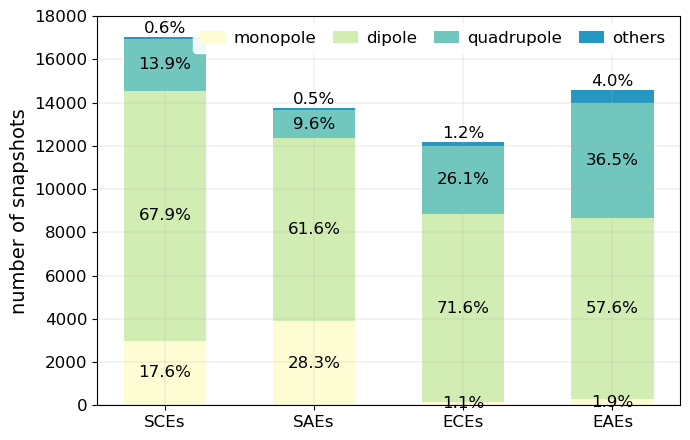

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
species = ('SCEs', 'SAEs', 'ECEs', 'EAEs')
SCEs = [np.sum(cc_sub==0), np.sum(cc_sub==2), np.sum(cc_sub==4), len(c_sub.track) - (np.sum(cc_sub==0) + np.sum(cc_sub==2) + np.sum(cc_sub==4))]
SAEs = [np.sum(ca_sub==0), np.sum(ca_sub==2), np.sum(ca_sub==4), len(a_sub.track) - (np.sum(ca_sub==0) + np.sum(ca_sub==2) + np.sum(ca_sub==4))]
ECEs = [np.sum(cc_frt==0), np.sum(cc_frt==2), np.sum(cc_frt==4), len(c_frt.track) - (np.sum(cc_frt==0) + np.sum(cc_frt==2) + np.sum(cc_frt==4))]
EAEs = [np.sum(ca_frt==0), np.sum(ca_frt==2), np.sum(ca_frt==4), len(a_frt.track) - (np.sum(ca_frt==0) + np.sum(ca_frt==2) + np.sum(ca_frt==4))]

bar_data = [SCEs, SAEs, ECEs, EAEs]  # 柱状图数据
inner_labels = ['monopole','dipole','quadrupole','others']  # 柱状图内部标签
colors_inner = ['#FEFCD3','#D1EDB3','#71C7BE','#2497C3']
# colors_inner = ['#3B4BA0','#7ED3F8','#E9F7FA','#FCF1BA']

# 转换为 numpy 数组
bar_data = np.array(bar_data)

# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(7, 4.5))

# 绘制堆叠柱状图
bottom = np.zeros(len(species))
for i, (label, color) in enumerate(zip(inner_labels, colors_inner)):
    ax.bar(species, bar_data[:, i], bottom=bottom, label=label, color=color, linewidth=1., width=0.55)
    bottom += bar_data[:, i]  # 更新底部位置

# 添加内部标签（显示为百分数，保留小数点后一位）
for i, bar in enumerate(ax.containers):
    # 获取每个柱子的总和（每行的和）
    total = np.sum(bar_data, axis=1)  # 按行求和，得到每个柱子的总和
    # 格式化标签为百分数
    labels = [f'{(value / total[j] * 100):.1f}%' if value != 0 else '' for j, value in enumerate(bar.datavalues)]
    
    # 如果是 others 分段，将标签置于顶端
    if inner_labels[i] == 'others':
        ax.bar_label(bar, labels=labels, label_type='edge', fontsize=12, color='black', padding=1)  # padding 控制标签与柱子的间距
    else:
        # 其他分段保持居中
        ax.bar_label(bar, labels=labels, label_type='center', fontsize=12, color='black')

# 设置标题和标签
ax.set_title('', fontsize=12, pad=20)
ax.set_xlabel('', fontsize=14)
ax.set_xticklabels(species, fontsize=12)#fontweight='bold')
ax.set_ylabel('number of snapshots', fontsize=14)
ax.set_yticklabels(np.linspace(0,18000,10,dtype=int),fontsize=12)#fontweight='bold')
ax.set_ylim([0, 18000])
plt.grid(linewidth='0.2')

# 添加图例
leg = ax.legend(title='', 
               fontsize=12,
               title_fontsize=12,
               frameon=True,
               framealpha=0.9,
               edgecolor='w',
               loc='upper right',  # 图例位置
               bbox_to_anchor=(1.0, 1.0),  # 图例锚点
               ncol=4,  # 将图例设置为一行
               handlelength=1.5,  # 图例句柄长度
               handletextpad=0.5,  # 图例句柄与文本间距
               columnspacing=1.0)  # 图例列间距

# 调整布局
plt.tight_layout()
# 保存图片
savePath = '/data/home/zhangrd/Pictures/1y_snapGIF/'
saveName = 'fig3.png'

fp0 = os.path.exists(savePath)
if not fp0:
    os.makedirs(savePath)
plt.savefig(savePath + saveName, dpi=300)
# plt.close()